# Support Vector Classifier (SVC)

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Veri seti oluşturalım.
X = np.random.rand(100, 2)
y = np.random.choice([0, 1], 100)

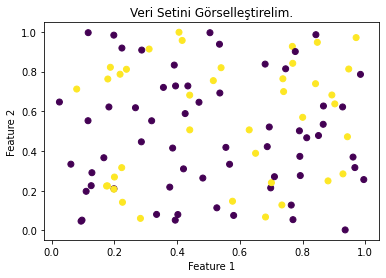

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Veri Setini Görselleştirelim.')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
# Eğitim ve test setlerini ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Eğitim veri setindeki sınıf dağılımını inceleyelim.
class_count = np.bincount(y_train)
print('Eğitim Veri Seti Sınıf Dağılımı:')
print(f'Sınıf 0: {class_count[0]} örnek')
print(f'Sınıf 1: {class_count[1]} örnek')

Eğitim Veri Seti Sınıf Dağılımı:
Sınıf 0: 47 örnek
Sınıf 1: 33 örnek


In [6]:
# Model kuralım.
model = SVC().fit(X_train, y_train)

In [7]:
# Tahmin yapalım.
predict = model.predict(X_test)

In [9]:
# Modeli Değerlendirelim.
accuracy = accuracy_score(y_test, predict)
print('Model Doğruluğu: ', accuracy)

Model Doğruluğu:  0.65


# Model Tuning

In [18]:
params = {
    'C': [0.5, 0.7, 1.0, 1.5, 2.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'coef0': [0.0, 0.1, 0.3, 0.5],
    'degree': [2, 3, 4, 5]
}

grid = GridSearchCV(estimator=model, param_grid=params, cv=5).fit(X_train, y_train)
best_params = grid.best_params_
print('Best Parameters: ', best_params)

Best Parameters:  {'C': 1.0, 'coef0': 0.0, 'degree': 3, 'kernel': 'poly'}


In [19]:
model = SVC(**best_params).fit(X_train, y_train)
predict = model.predict(X_test)
accuracy = accuracy_score(y_test, predict)
print('Accuracy Score: ', accuracy)

Accuracy Score:  0.75


In [20]:
# Model Doğrulama
score = cross_val_score(model, X, y, cv=5)
print('Skorlar: ', score)
print('Skorlar Ortalaması: ', score.mean())

Skorlar:  [0.55 0.65 0.6  0.65 0.55]
Skorlar Ortalaması:  0.6


In [22]:
predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [23]:
y_test

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [28]:
confusion = confusion_matrix(y_test, predict)
print(confusion)

[[12  2]
 [ 3  3]]


In [30]:
predict.size

20

# Sonuç

### Veri setini kendimiz oluşturduğumuz için gerçek hayat senaryosu değildir. Amacımız pratik yapmaktır. Doğrusal olmayan karışık bir veri setine sahip olmamıza rağmen 20 tahminden 15'i doğru. Fena olmayan bir sonuç diyebilirim.